---
title: Time Series Analysis with Python (Part 2)
subtitle: The second in the series!
date: 2022-06-06
author: Darpan Ganatra
categories: [jupyter, python, timeseries]
draft: true
format:
  html: 
    code-fold: false
---

In [34]:
#| code-fold: true
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
)

df.Month = pd.DatetimeIndex(df.Month, freq="MS")
df = df.set_index("Month")

# Decomposition

Time series can be thought of as made up of in a few components. Specifically: 

- $S_{t}$: Seasonal component
- $T_{t}$: Trend component
- $R_{t}$: Remainder component

These few components can be put together a few ways, but there are two ways that are common: 

- Additive decomposition
- Multiplicative decomposition

## Additive Decomposition

$$
y_{t} = S_t + T_t + R_t
$$

This is relatively easy to understand when we make an additive time series. Here's an intuitive(-ish) example: 

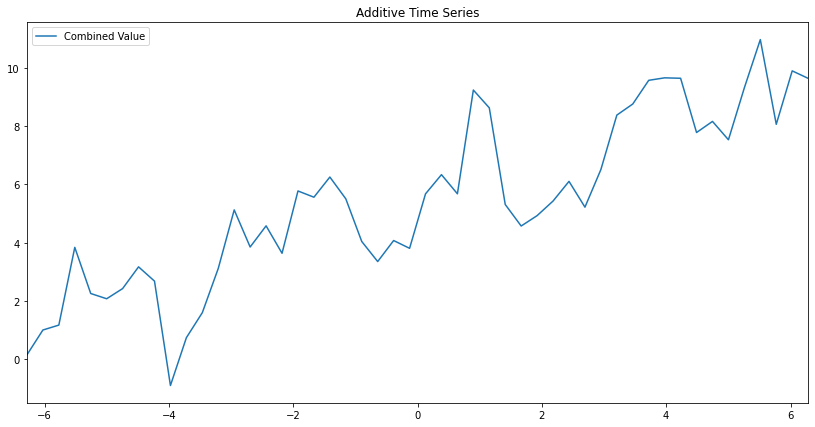

In [28]:
#| code-fold: true
t = np.linspace(-2 * np.pi, 2 * np.pi)
s_t = np.sin(2 * t)
t_t = np.linspace(start=1, stop=len(t) / 5, num=len(t))
r_t = np.random.randn(len(t))

plt.figure(figsize=(14, 7))
plt.title("Additive Time Series")
plt.plot(t, s_t + t_t + r_t, label="Combined Value")
plt.xlim(left=min(t), right=max(t))
plt.legend()
plt.show()

Below we can actually see the separate components I used to make this plot! Notice how each of the series added together creates the final plot above. That's additive seasonal decomposition in a nutshell. Finding those components.

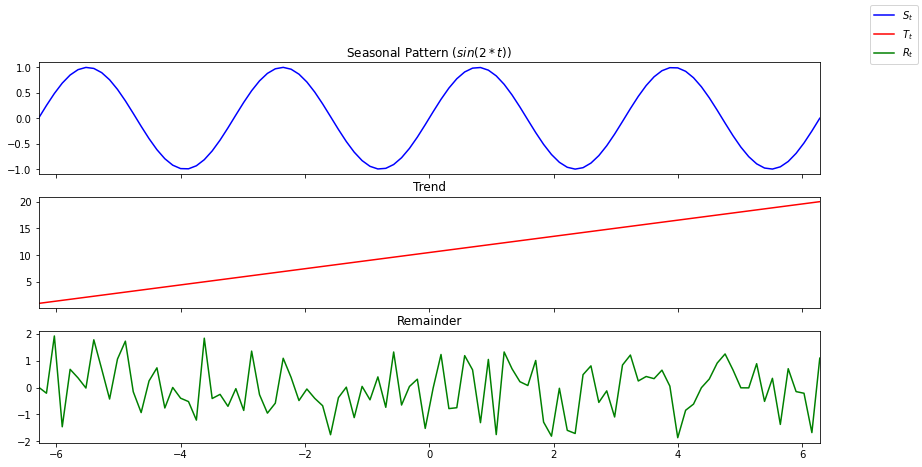

In [20]:
#| code-fold: true
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 7), sharex=True)
ax[0].plot(t, s_t, label=r"$S_{t}$", color="blue")
ax[1].plot(t, t_t, label=r"$T_{t}$", color="red")
ax[2].plot(t, r_t, label=r"$R_{t}$", color="green")

ax[0].set_xlim(left=min(t), right=max(t))

ax[0].set_title(r"Seasonal Pattern ($sin(2*t)$)")
ax[1].set_title("Trend")
ax[2].set_title("Remainder")
fig.legend()
plt.show()

## Multiplicative Decomposition

Multiplicative decomposition is the same as additive (in a way) but with multiplication. I know, shocking. Ridiculously shocking. 

$$
y_{t} = S_t * T_t * R_t
$$

There's one thing to note that actually is interesting. There's an increase in the variance from what we see as "trend". 

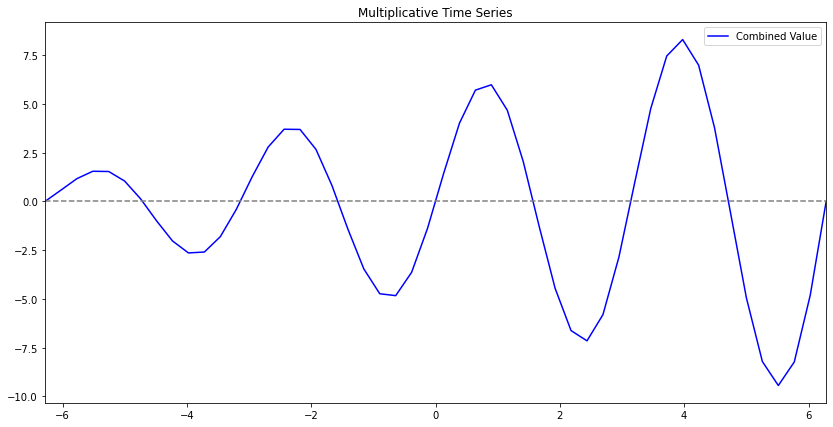

In [33]:
#| code-fold: true

plt.figure(figsize=(14, 7))
plt.title("Multiplicative Time Series")
plt.plot(t, s_t * t_t, label="Combined Value", color="blue")
plt.axhline(y=0, linestyle="--", color="grey")
plt.xlim(left=min(t), right=max(t))
plt.legend()
plt.show()

Keep in mind the components are exactly the same as previously.

In [68]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
model = seasonal_decompose(x = df['Passengers'], model = 'multiplicative')

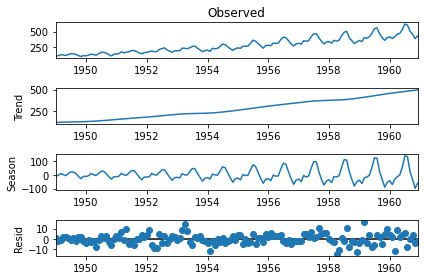

In [70]:
stl = STL(df)
res = stl.fit()
fig = res.plot()